In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as  plt
import seaborn as sns

# Load data

In [2]:
df=pd.read_csv("titanic.csv")

# Data Understanding

In [4]:
#How many rows and columns are there in the Titanic dataset?
df.shape

(891, 15)

In [5]:
#What are the names of the columns and their data types?
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [6]:
#Can you display the first 5 rows of the dataset to get an initial look at the data?
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Data Cleaning

In [8]:
#Are there any missing values in the dataset? If so, how would you handle them?
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
#How many passengers had missing age values, and how did you handle them?
df["age"].isna().sum()

177

In [14]:
median_value=df["age"].median()
df["age"].fillna(median_value,inplace=True)

0

In [20]:
#Did you identify any outliers in numeric columns (e.g., fare) that required treatment?
Q1=df["fare"].quantile(0.5)
Q3=df["fare"].quantile(0.75)
IQR=Q3-Q1
lower_value=Q1-1.5*IQR
Upper_value=Q3+1.5*IQR
Outliers=df[(df["fare"]<lower_value)|(df["fare"]>Upper_value)]
Remove_outliers=df[(df["fare"]>lower_value)&(df["fare"]<Upper_value)]

# Survival Analysis


In [23]:
# What is the overall survival rate among passengers?

Survival=df["survived"].sum()
Passengers=len(df)
Total_rate=(Survival/Passengers)*100
Total_rate


38.38383838383838

In [25]:
# How does the survival rate vary by gender?
survival_rate=df.groupby("sex")["survived"].sum()
survival_rate

sex
female    233
male      109
Name: survived, dtype: int64

In [29]:
# What is the survival rate for passengers in each class (Pclass)?
Survival_Class=df.groupby("pclass")["survived"].mean()*100
Survival_Class

pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64

In [34]:
#Did passengers with family members (e.g., siblings or spouses) on 
# board have a higher or lower chance of survival?
df["Family"]=df["sibsp"]+df["parch"]
Family_survival=df.groupby("Family")["survived"].mean()*100
Family_survival

Family
0     30.353818
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
Name: survived, dtype: float64

# Age Distribution

C:\Users\Z\desktop\EDA_pro\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


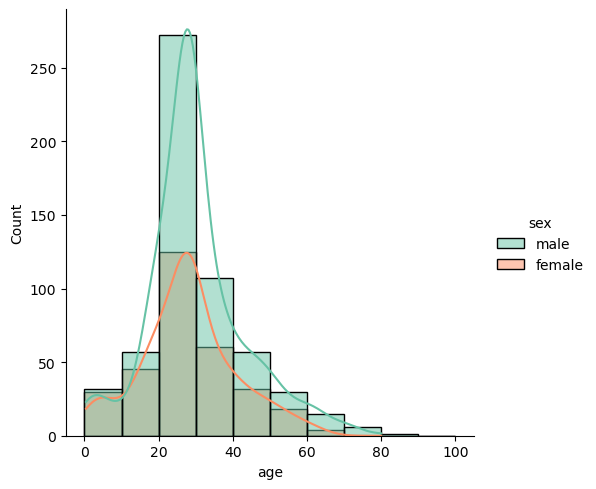

In [39]:
#Create a histogram to visualize the distribution of passenger ages. 
#Does it follow a normal distribution?
sns.displot(x="age",data=df, hue="sex",kde=True,
            palette="Set2",
           bins=[0,10,20,30,40,50,60,70,80,90,100]);

In [53]:
#How did age relate to survival? 
#Did certain age groups have a higher chance of survival?
bins_value=[0,18,25,75,100]
bins_label=["0-17","18-24","25-74","75-99"]
df["AgeGroup"]=pd.cut(df["age"],bins=bins_value,labels=bins_label)
survival_rate_age=df.groupby("AgeGroup")["survived"].mean()*100
survival_rate_age



AgeGroup
0-17      50.359712
18-24     33.333333
25-74     36.842105
75-99    100.000000
Name: survived, dtype: float64

# Fare Analysis

C:\Users\Z\desktop\EDA_pro\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


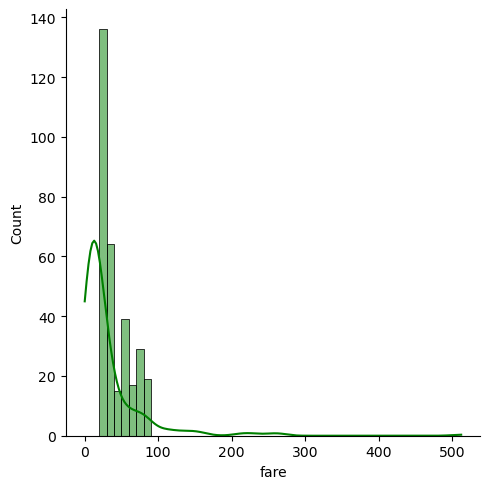

In [59]:
#Create a histogram to visualize the distribution of ticket fares.
#Are there any noticeable patterns?
sns.displot(x="fare", data=df, bins=[20,30,40,50,60,70,80,90],
            kde=True,
            color="g"
           );

In [63]:
#How does ticket fare correlate with passenger class (Pclass)?
fare_class=df.groupby("fare")["survived"].describe()
fare_class

,count,mean,std,min,25%,50%,75%,max
fare,,,,,,,,
0.0000,15.0,0.066667,0.258199,0.0,0.00,0.0,0.00,1.0
4.0125,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
5.0000,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
6.2375,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
6.4375,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...
227.5250,4.0,0.750000,0.500000,0.0,0.75,1.0,1.00,1.0
247.5208,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
262.3750,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


<Axes: xlabel='Better_chance'>

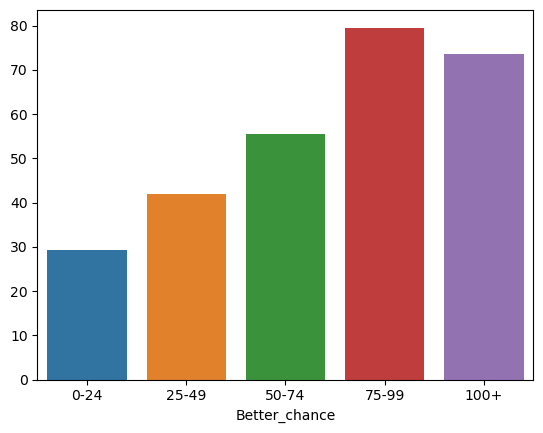

In [72]:
#Did passengers who paid higher fares have a better chance of survival?
bins_value=[0,25,50,75,100, float("inf")]
bin_label=["0-24","25-49","50-74","75-99","100+"]
df["Better_chance"]=pd.cut(df["fare"],bins=bins_value,labels=bin_label)
survival_chance=df.groupby("Better_chance")["survived"].mean()*100
sns.barplot(x=survival_chance.index,y=survival_chance.values)

# Embarkation Ports

In [75]:
#What were the embarkation ports, 
#and how many passengers embarked from each port?
df["embarked"].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

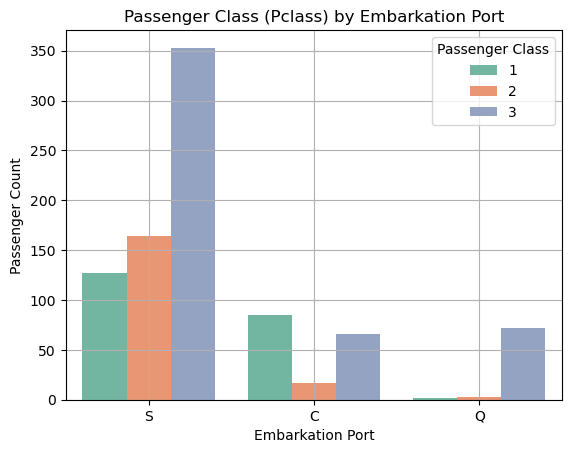

In [87]:
#How did embarkation port relate to passenger class and survival?
sns.countplot(x="embarked",hue="pclass", palette="Set2",
             data=df)
plt.xlabel('Embarkation Port')
plt.ylabel('Passenger Count')
plt.title('Passenger Class (Pclass) by Embarkation Port')
plt.legend(title='Passenger Class', loc='upper right')
plt.grid(True);


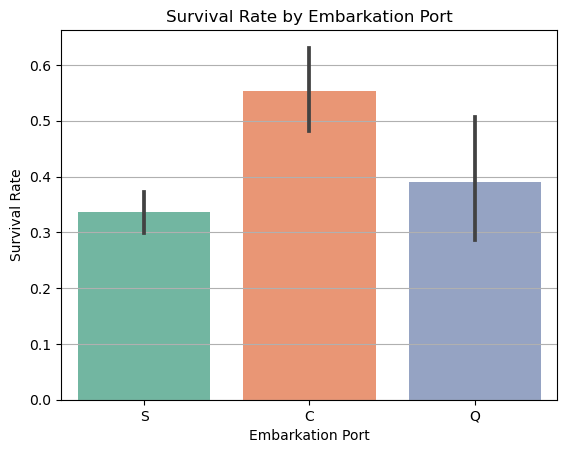

In [88]:
sns.barplot(data=df, x='embarked', y='survived', palette='Set2')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Embarkation Port')
plt.grid(axis='y')

# Correlation Analysis

In [99]:
#Calculate and visualize the correlation matrix between numeric features. 
#Are there strong correlations between any of them
correlation_matrix=df[["survived", "pclass","age","sibsp","parch","fare"]]
corr_matrix=correlation_matrix.corr()
corr_matrix

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


<Axes: >

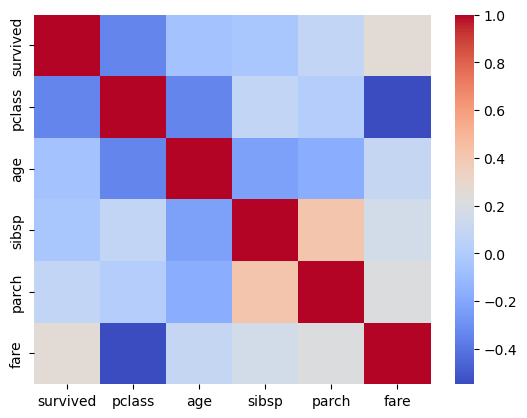

In [104]:
#Create a heatmap to better understand the relationships.
sns.heatmap(corr_matrix, cmap="coolwarm")